<a href="https://colab.research.google.com/github/Tdas-christ/Machine_Learning/blob/main/2348569_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DATASETS/insurance.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


LABEL ENCODING FOR THE CATEGORICAL VARIABLES

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_data = data[['sex', 'smoker', 'region']]
for col in cat_data:
  data[col] = le.fit_transform(cat_data[col])

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


LINEAR REGRESSION MODEL

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data.drop(columns = 'charges', axis=1)
Y = data['charges']

linreg = LinearRegression()


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

linreg.fit(X_train, Y_train)

Y_pred = linreg.predict(X_test)

MODEL EVALUATION

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)


In [20]:
# Calculate adjusted R-squared score
n = len(Y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [21]:
# Calculate Residual Sum of Squares (RSS)
rss = np.sum((Y_test - Y_pred) ** 2)

In [22]:
# Calculate Explained Variance Score
explained_variance = 1 - (rss / np.sum((Y_test - np.mean(Y_test)) ** 2))

In [26]:
print("Mean Absolute Error:", round(mae,2))
print("Mean Squared Error:", round(mse,2))
print("Root Mean Squared Error:", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))
print("Adjusted R-squared Score:", round(adj_r2,2))
print("Residual Sum of Squares (RSS):", round(rss,2))
print("Explained Variance Score:", round(explained_variance,2))

Mean Absolute Error: 4186.51
Mean Squared Error: 33635210.43
Root Mean Squared Error: 5799.59
R-squared (R2) Score: 0.78
Adjusted R-squared Score: 0.78
Residual Sum of Squares (RSS): 9014236395.56
Explained Variance Score: 0.78


FEATURE IMPORTANCE

In [27]:
# Get feature importance
feature_importance = linreg.coef_

In [28]:
# Match feature importance to feature names
feature_names = X.columns

In [29]:
# Creating a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [30]:
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
    Feature    Importance
4    smoker  23647.818096
3  children    425.091456
2       bmi    335.781491
0       age    257.056264
1       sex    -18.791457
5    region   -271.284266


VISUALIZATION

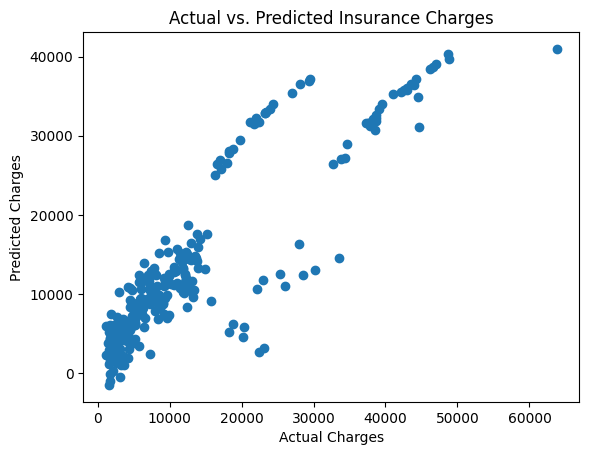

In [32]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Insurance Charges")
plt.show()

 We can see that quitting smoking will definitely have a significant positive impact on reducing the insurance charges. Also children are also one of the major reasons of high insurance charges. Maintaining a healthy BMI can also help reducing the insurance charges.